## BANA 200A Group Project Report


### Introduction
In this case, our objective is to identify useful customer segments in the reservations data by using Python, and to visualize the segments in a way that could lead to actionable marketing insights.

Step 1
We need to identify customer segments in the data by using the K-Means Clustering method. We assume there are 5 centroids.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving sample_data_transformed.csv to sample_data_transformed (4).csv


In [ ]:
uploaded2=files.upload()

Saving sample_data_transformed.csv to sample_data_transformed.csv


In [ ]:
# Import Module

import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the data into DataFrame
df = pd.read_csv('Clustering Data.csv')

df.head()

,uid,PNRLocatorID,avg_amt,round_trip,group_size,group,days_pre_booked,BookingChannel_Other,BookingChannel_Outside_Booking,BookingChannel_Reservations_Booking,...,true_destination_dest_SXM,true_destination_dest_TPA,true_destination_dest_ZIH,UflyMemberStatus_Elite,UflyMemberStatus_non-ufly,UflyMemberStatus_Standard,seasonality_Q1,seasonality_Q2,seasonality_Q3,seasonality_Q4
0,504554455244696420493F7C2067657420746869732072...,AADMLF,0.019524,0,0.000,0,0.029703,0,1,0,...,0,0,0,0,0,1,0,0,0,1
1,46495853454E44696420493F7C20676574207468697320...,AAFBOM,0.081774,1,0.000,0,0.039604,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,534355545444696420493F7C2067657420746869732072...,AAFILI,0.026650,0,0.125,1,0.069307,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,534355545444696420493F7C2067657420746869732072...,AAFILI,0.026650,0,0.125,1,0.069307,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,44554D4D414E4E44696420493F7C206765742074686973...,AAFRQI,0.000000,1,0.000,0,0.035361,0,1,0,...,0,0,0,0,1,0,0,0,0,1


Now we can perform the K-means clustering on the data and we assume 5 centroids.

In [ ]:
k = 5 # Number of clusters

# Create an instance of the KMeans class and assign it to variable kmeans
kmeans = KMeans(n_clusters = k)

# Applying the fit method to create a KMeans model using the data
df2 = df.drop(['uid','PNRLocatorID'], axis=1)
kmeans.fit(df2)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [ ]:
labels = kmeans.labels_

df['Cluster'] = labels

### Step 2
Now we extract the cluster "Assignments" from the cluster results data set and add it to the reservations data.

In [ ]:
# Load the reservation data into a DataFrame
customer_data = pd.read_csv('sample_data_transformed.csv')
clustered_data = df[['uid','Cluster']].copy()
final_dataframe = customer_data.merge(clustered_data[['uid', 'Cluster']], on='uid', how='left')

<ipython-input-183-eaf8917007d4>:2: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  customer_data = pd.read_csv('sample_data_transformed.csv')


### Step 3
Now we are trying to visualize the segment data by using Python.

In [ ]:
final_dataframe.columns


Index(['Unnamed: 0', 'PNRLocatorID', 'PaxName', 'TicketNum', 'CouponSeqNbr',
       'ServiceStartCity', 'ServiceEndCity', 'PNRCreateDate',
       'ServiceStartDate', 'EncryptedName', 'GenderCode', 'birthdateid', 'Age',
       'PostalCode', 'BkdClassOfService', 'TrvldClassOfService',
       'BookingChannel', 'BaseFareAmt', 'TotalDocAmt', 'UFlyRewardsNumber',
       'UflyMemberStatus', 'CardHolder', 'BookedProduct', 'EnrollDate',
       'MarketingFlightNbr', 'MarketingAirlineCode', 'StopoverCode', 'uid',
       'age_group', 'true_origins', 'final_destination', 'round_trip',
       'group_size', 'group', 'seasonality', 'days_pre_booked',
       'true_destination', 'Cluster'],
      dtype='object')

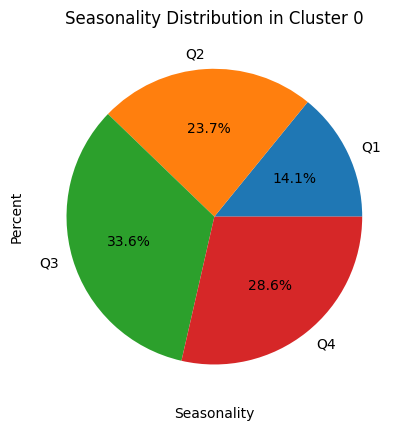

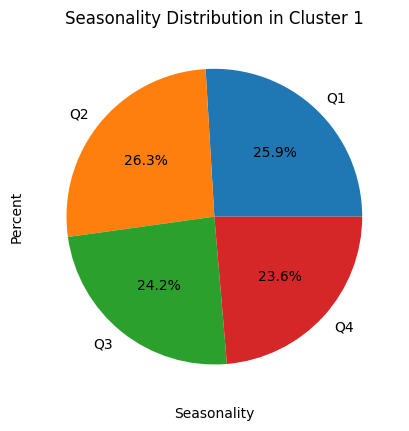

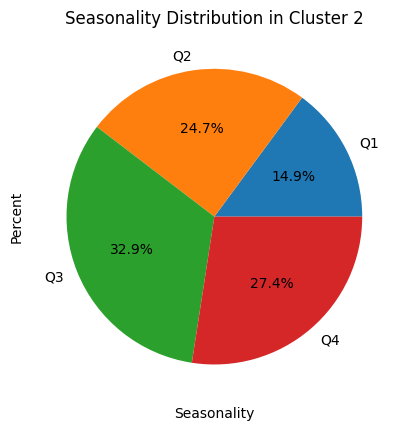

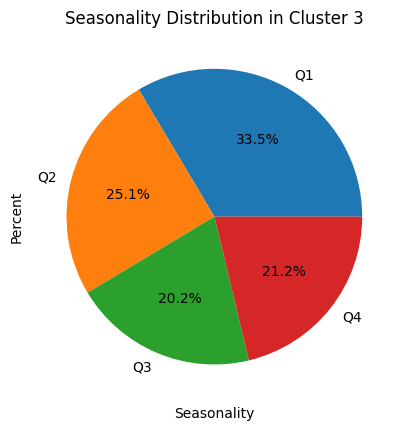

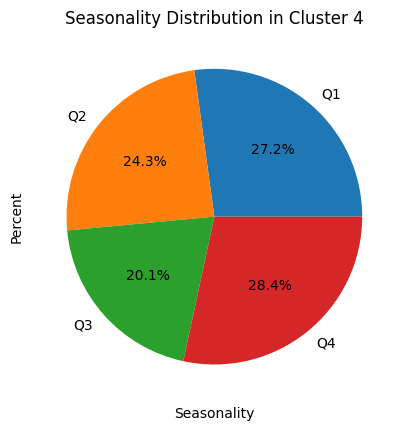

In [ ]:
# Count the number of occurrences for each age group and cluster
season_count = final_dataframe.groupby(['seasonality', 'Cluster']).size().unstack(fill_value=0)

# Normalize the counts to get percentages
season_count_percentage = season_count.div(season_count.sum(axis=1), axis=0) * 100

# Create pie charts for each cluster
for cluster in season_count_percentage.columns:
    plt.figure()
    plt.pie(season_count_percentage[cluster], labels=season_count_percentage.index, autopct='%1.1f%%')
    plt.title(f'Seasonality Distribution in Cluster {cluster}')
    plt.ylabel('Percent')
    plt.xlabel('Seasonality')
    plt.show()

Cluster         0     1     2     3     4
seasonality                              
Q1            586  1879   530  2543  1191
Q2            909  1760   815  1758   987
Q3           1341  1681  1127  1468   848
Q4           1260  1820  1038  1712  1322


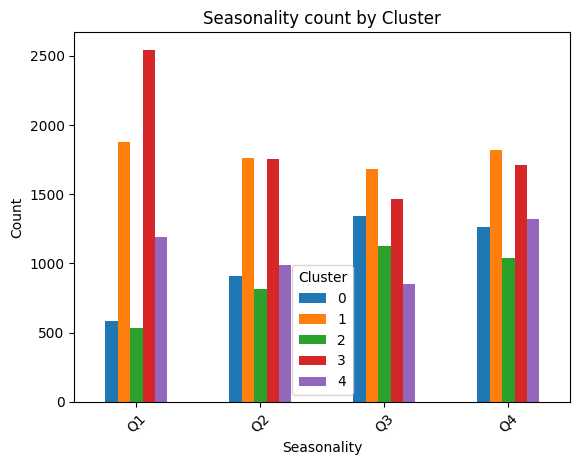

In [ ]:
# Count the number of occurrences for each age group and cluster
season_count = final_dataframe.groupby(['seasonality', 'Cluster']).size().unstack(fill_value=0)
print(season_count)

# Create bar chart
season_count.plot(kind='bar')
plt.xlabel('Seasonality')
plt.ylabel('Count')
plt.title('Seasonality count by Cluster')
plt.xticks(rotation=45)
plt.show()

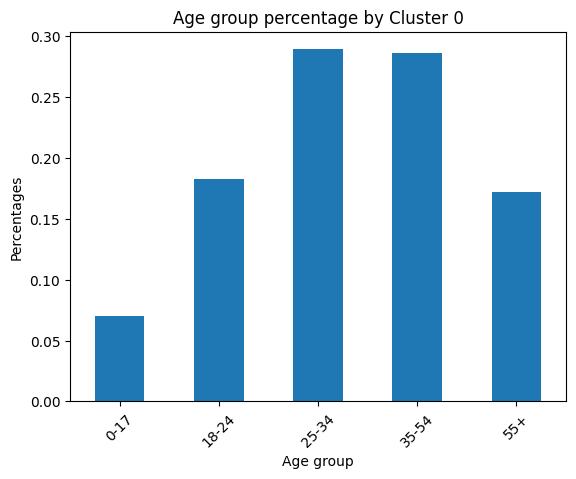

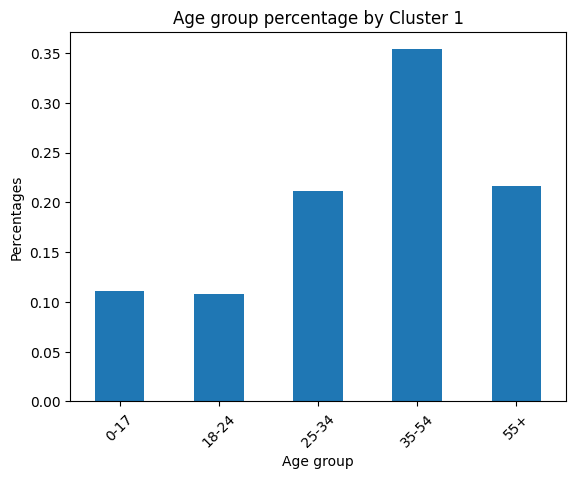

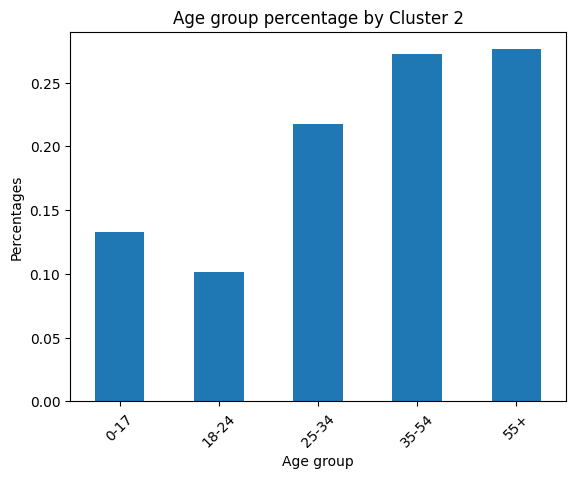

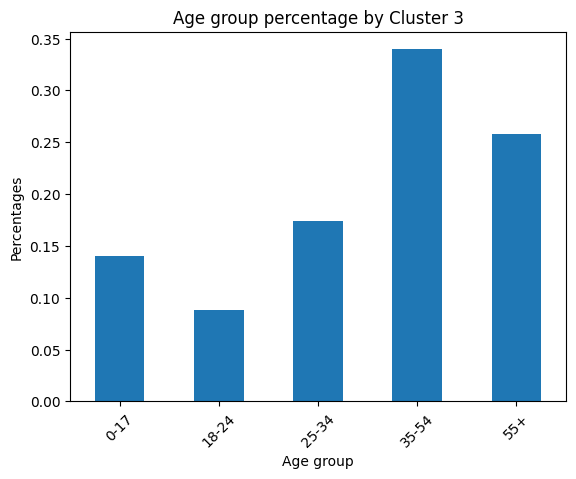

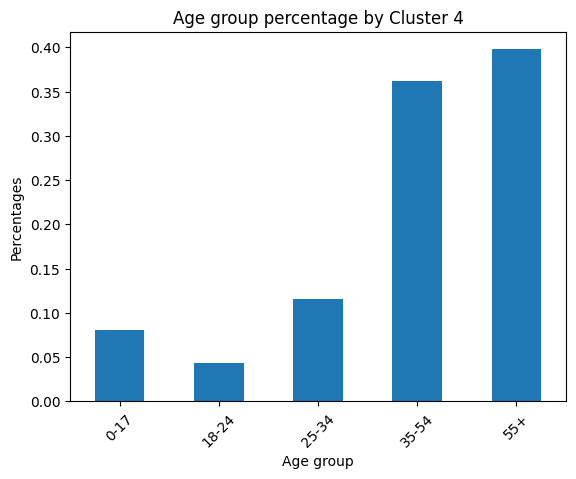

Cluster           0         1         2         3         4
age_group                                                  
0-17       0.070312  0.110784  0.132764  0.140757  0.081187
18-24      0.182861  0.107423  0.101425  0.088090  0.043928
25-34      0.289062  0.211485  0.217379  0.173907  0.115685
35-54      0.285889  0.353501  0.272365  0.339527  0.361546
55+        0.171875  0.216807  0.276068  0.257720  0.397654


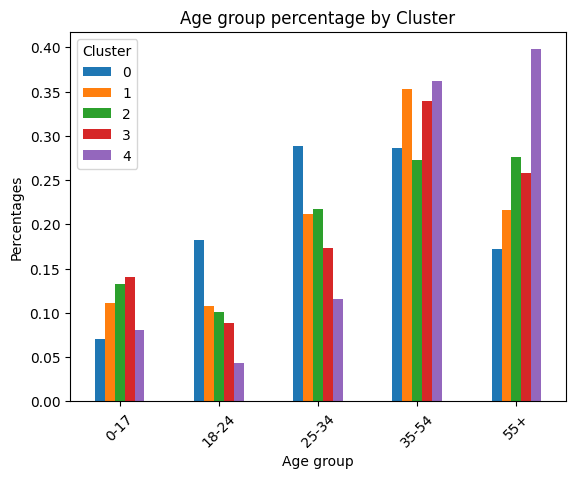

In [ ]:
# Count the number of occurrences for each age group and cluster
agegroup_count = final_dataframe.groupby(['age_group', 'Cluster']).size().unstack(fill_value=0)
sum=0
for i in range(0,5):
  sum=agegroup_count[i].sum()
  agegroup_count[i]=agegroup_count[i]/sum
  agegroup_count[i].plot(kind='bar')
  plt.xlabel('Age group')
  plt.ylabel('Percentages')
  plt.title('Age group percentage by Cluster '+str(i))
  plt.xticks(rotation=45)
  plt.show()

print(agegroup_count)

# Create bar chart
agegroup_count.plot(kind='bar')
plt.xlabel('Age group')
plt.ylabel('Percentages')
plt.title('Age group percentage by Cluster')
plt.xticks(rotation=45)
plt.show()

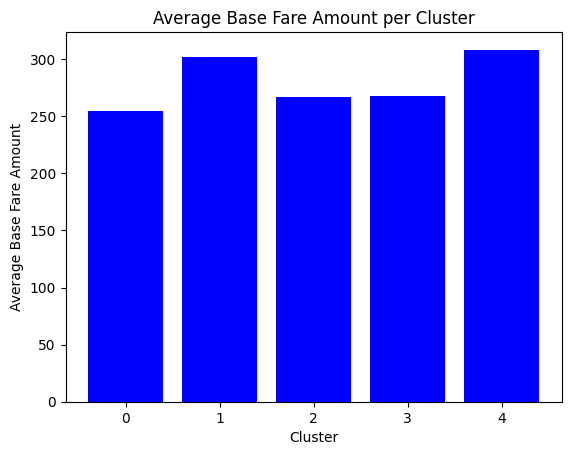

In [ ]:
# Calculate average base fare for each cluster
avg_base_fare = final_dataframe.groupby('Cluster')['BaseFareAmt'].mean()

# Create bar chart
plt.bar(avg_base_fare.index, avg_base_fare.values, color='blue')
plt.xlabel('Cluster')
plt.ylabel('Average Base Fare Amount')
plt.title('Average Base Fare Amount per Cluster')
plt.show()


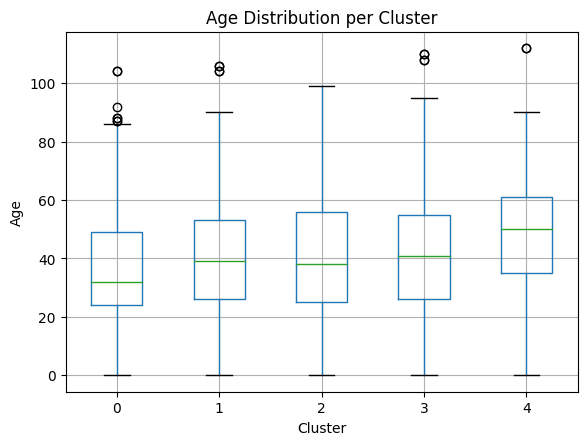

In [ ]:
# Create box plot for Age distribution per cluster
final_dataframe.boxplot(column='Age', by='Cluster')
plt.xlabel('Cluster')
plt.ylabel('Age')
plt.title('Age Distribution per Cluster')
plt.suptitle('')  # Suppress the automatic title
plt.show()


Cluster                     0         1         2         3         4
BkdClassOfService                                                    
Coach                 0.98999  0.994538  0.947863  0.975538  0.933533
Discount First Class  0.00000  0.000000  0.000285  0.000000  0.000920
First Class           0.01001  0.005462  0.051852  0.024462  0.065547
Cluster                      0         1         2         3         4
TrvldClassOfService                                                   
Coach                 0.955811  0.959104  0.898575  0.936105  0.844756
Discount First Class  0.016113  0.016387  0.031624  0.017110  0.061638
First Class           0.028076  0.024510  0.069801  0.046785  0.093606


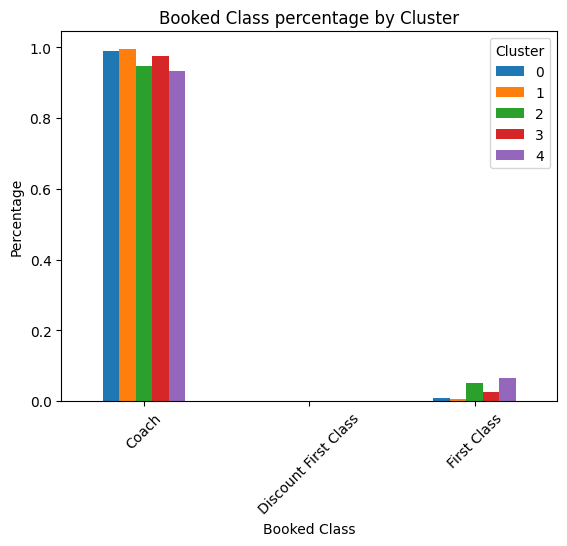

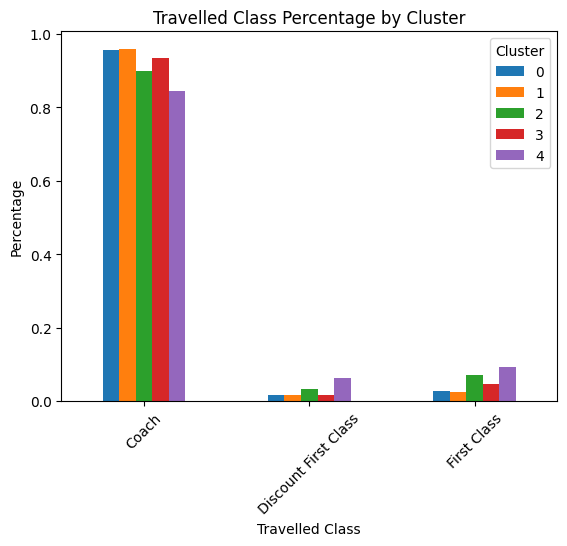

In [ ]:
bookedclass_count = final_dataframe.groupby(['BkdClassOfService', 'Cluster']).size().unstack(fill_value=0)
for i in range(0,5):
  sum=bookedclass_count[i].sum()
  bookedclass_count[i]=bookedclass_count[i]/sum
travelledclass_count=final_dataframe.groupby(['TrvldClassOfService', 'Cluster']).size().unstack(fill_value=0)
for i in range(0,5):
  sum=travelledclass_count[i].sum()
  travelledclass_count[i]=travelledclass_count[i]/sum
print(bookedclass_count)

print(travelledclass_count)


# Create bar chart
bookedclass_count.plot(kind='bar')
plt.xlabel('Booked Class')
plt.ylabel('Percentage')
plt.title('Booked Class percentage by Cluster')
plt.xticks(rotation=45)
plt.show()

# Create bar chart
travelledclass_count.plot(kind='bar')
plt.xlabel('Travelled Class')
plt.ylabel('Percentage')
plt.title('Travelled Class Percentage by Cluster')
plt.xticks(rotation=45)
plt.show()

Cluster            0         1         2         3         4
round_trip                                                  
0           0.472412  0.111204  0.417094  0.115626  0.117065
1           0.527588  0.888796  0.582906  0.884374  0.882935


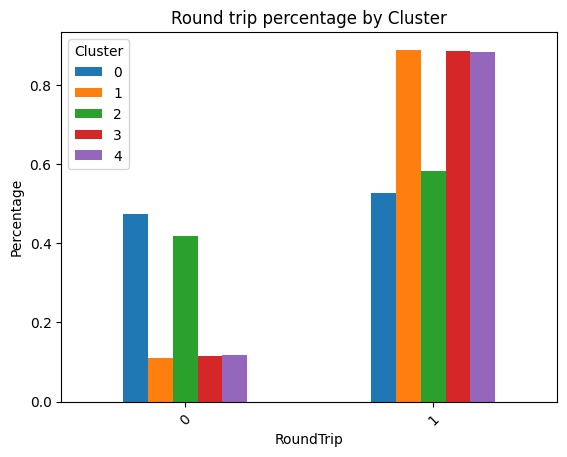

In [ ]:
# Count the number of occurrences for each age group and cluster
roundtrip_count = final_dataframe.groupby(['round_trip', 'Cluster']).size().unstack(fill_value=0)
for i in range(0,5):
  sum=roundtrip_count[i].sum()
  roundtrip_count[i]=roundtrip_count[i]/sum

print(roundtrip_count)

# Create bar chart
roundtrip_count.plot(kind='bar')
plt.xlabel('RoundTrip')
plt.ylabel('Percentage')
plt.title('Round trip percentage by Cluster')
plt.xticks(rotation=45)
plt.show()

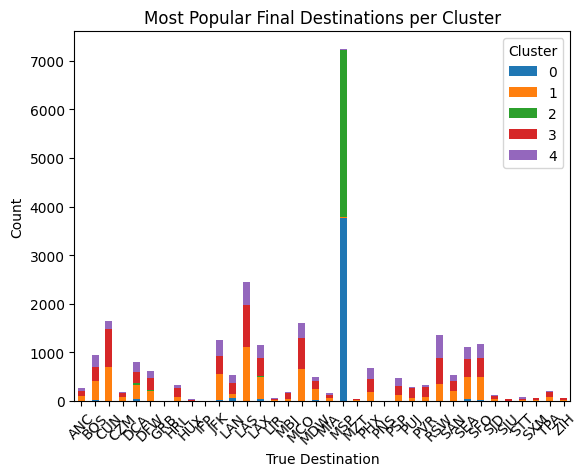

In [ ]:
# Count the number of occurrences for each final destination and cluster
destination_count = final_dataframe.groupby(['true_destination', 'Cluster']).size().unstack(fill_value=0)

# Create bar chart
destination_count.plot(kind='bar', stacked=True)
plt.xlabel('True Destination')
plt.ylabel('Count')
plt.title('Most Popular Final Destinations per Cluster')
plt.xticks(rotation=45)
plt.show()


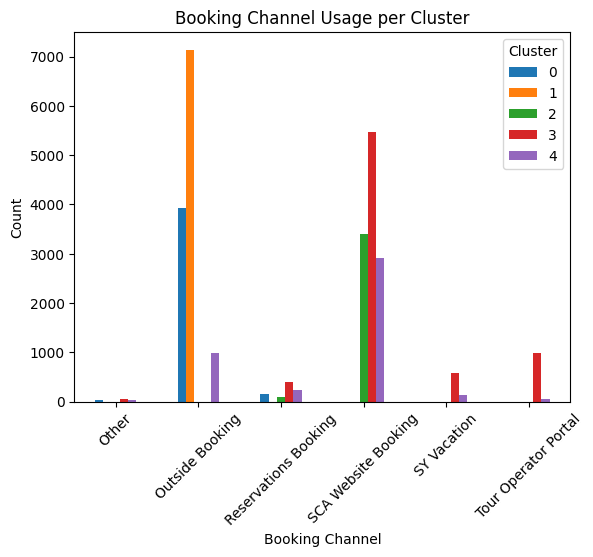

In [ ]:
# Count the number of occurrences for each booking channel and cluster
channel_count = final_dataframe.groupby(['BookingChannel', 'Cluster']).size().unstack(fill_value=0)

# Create bar chart
channel_count.plot(kind='bar')
plt.xlabel('Booking Channel')
plt.ylabel('Count')
plt.title('Booking Channel Usage per Cluster')
plt.xticks(rotation=45)
plt.show()


Cluster
0    36.274170
1    61.737395
2    50.997436
3    60.062692
4    67.800598
Name: days_pre_booked, dtype: float64


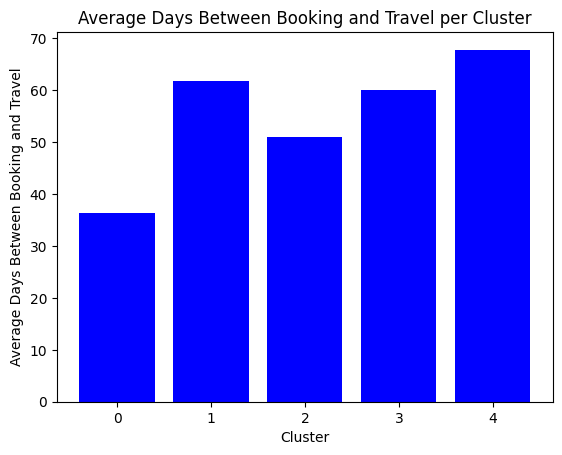

In [ ]:
# Count the number of occurrences for each days between booking and cluster
days_pre_booked = final_dataframe.groupby('Cluster')['days_pre_booked'].mean()
print(days_pre_booked)
# Create bar chart
plt.bar(days_pre_booked.index, days_pre_booked.values, color= 'blue')
plt.xlabel('Cluster')
plt.ylabel('Average Days Between Booking and Travel')
plt.title('Average Days Between Booking and Travel per Cluster')
plt.show()


Cluster        0     1     2     3     4
group_size                              
1           2724  2330  1730  2171  1797
2            878  2819  1096  3077  1741
3            234   684   384   707   361
4            164   824   197   830   345
5             72   323    83   326    76
6             24   132     6   170    28
7              0    28    14   126     0
8              0     0     0    56     0
9              0     0     0    18     0
Cluster     0     1     2     3     4
group                                
0        2724  2330  1730  2171  1797
1        1372  4810  1780  5310  2551


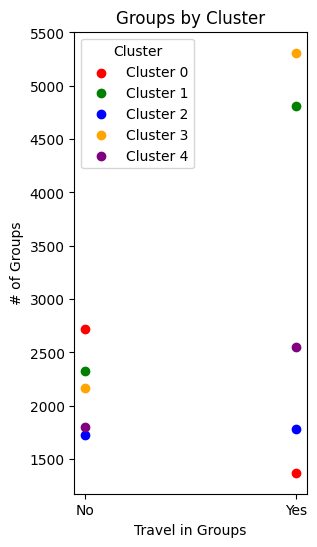

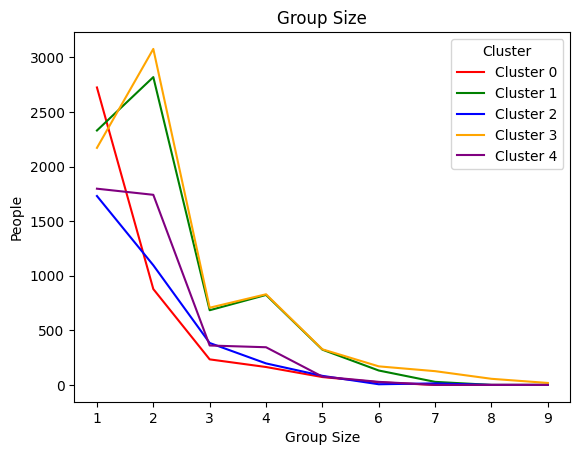

<Axes: xlabel='group_size'>

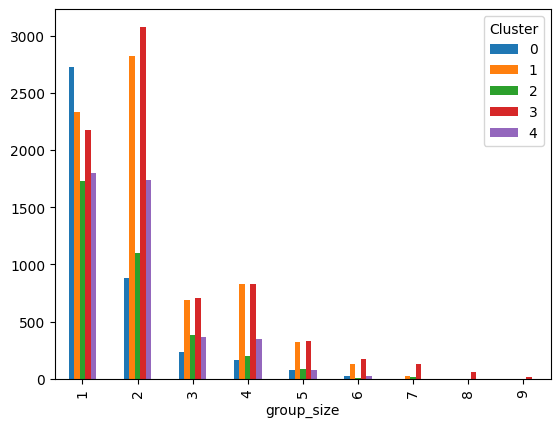

In [ ]:
# Count the number of occurrences for each days between booking and cluster
group_size = final_dataframe.groupby(['group_size', 'Cluster']).size().unstack(fill_value=0)
group = final_dataframe.groupby(['group', 'Cluster']).size().unstack(fill_value=0)

print(group_size)
print(group)

colors = ['red', 'green', 'blue', 'orange', 'purple']

# Create bar chart
plt.figure(figsize=(3,6))

for i, cluster in enumerate(group.columns):
    plt.scatter(group.index, group[cluster], color=colors[i], label=f'Cluster {cluster}')

plt.xticks([0, 1], ["No", "Yes"])

plt.xlabel('Travel in Groups')
plt.ylabel('# of Groups')
plt.title('Groups by Cluster')
plt.legend(title='Cluster')
plt.show()

# Create bar chart
for i, cluster in enumerate(group_size.columns):
    plt.plot(group_size.index, group_size[cluster], color=colors[i], label=f'Cluster {cluster}')

plt.xlabel('Group Size')
plt.ylabel('People')
plt.title('Group Size')
plt.legend(title='Cluster')
plt.show()

group_size.plot(kind='bar')

Cluster          0     1     2     3     4
CouponSeqNbr                              
1             2454  3865  2380  4153  2426
2             1522  2997  1114  3262  1864
3               60   159    11    38    37
4               59   119     5    28    21
5                1     0     0     0     0


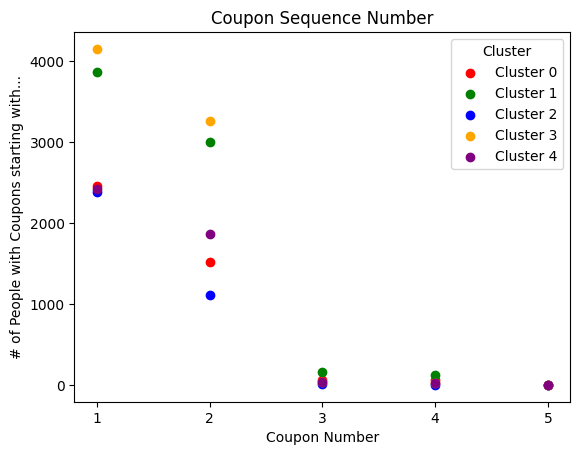

In [ ]:
CouponSeqNbr = final_dataframe.groupby(['CouponSeqNbr', 'Cluster']).size().unstack(fill_value=0)

print(CouponSeqNbr)

for i, cluster in enumerate(group.columns):
    plt.scatter(CouponSeqNbr.index, CouponSeqNbr[cluster], color=colors[i], label=f'Cluster {cluster}')
x_ticks = [1, 2, 3, 4, 5]
x_tick_labels = ['1', '2', '3', '4', '5']
plt.xticks(x_ticks, x_tick_labels)

plt.xlabel('Coupon Number')
plt.ylabel('# of People with Coupons starting with...')
plt.title('Coupon Sequence Number')
plt.legend(title='Cluster')
plt.show()

Cluster          0     1     2     3     4
StopoverCode                              
O             1855  4178  1004  3273  2042
X              490   200   126    55    39


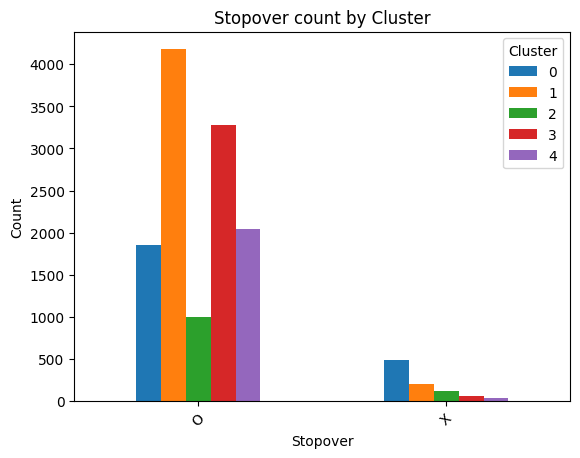

In [ ]:
# Count the number of occurrences for each Stopover code p and cluster
stopovercode_count = final_dataframe.groupby(['StopoverCode', 'Cluster']).size().unstack(fill_value=0)

print(stopovercode_count)

# Create bar chart
stopovercode_count.plot(kind='bar')
plt.xlabel('Stopover')
plt.ylabel('Count')
plt.title('Stopover count by Cluster')
plt.xticks(rotation=45)
plt.show()

Cluster              0         1         2         3         4
StopoverCode                                                  
O             0.791045  0.954317  0.888496  0.983474  0.981259
X             0.208955  0.045683  0.111504  0.016526  0.018741


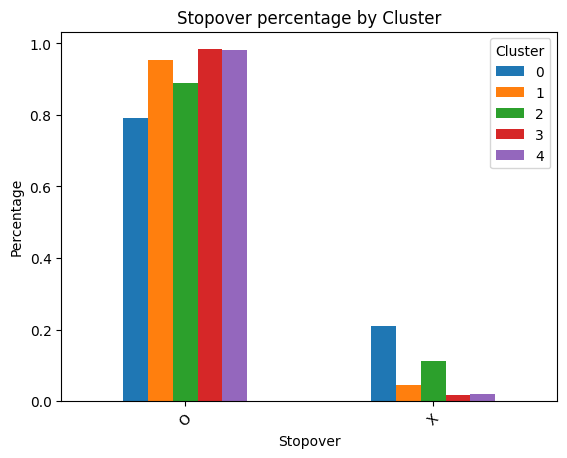

In [ ]:
# Count the number of occurrences for each Stopover code p and cluster
stopovercode_count = final_dataframe.groupby(['StopoverCode', 'Cluster']).size().unstack(fill_value=0)
for i in range(0,5):
  sum=stopovercode_count[i].sum()
  stopovercode_count[i]=stopovercode_count[i]/sum

print(stopovercode_count)

# Create bar chart
stopovercode_count.plot(kind='bar')
plt.xlabel('Stopover')
plt.ylabel('Percentage')
plt.title('Stopover percentage by Cluster')
plt.xticks(rotation=45)
plt.show()

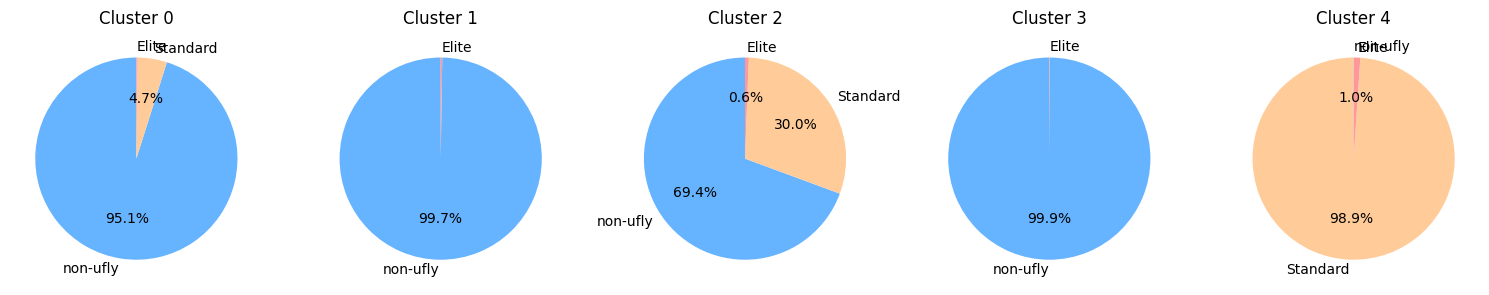

In [ ]:
# Create a figure with 5 subplots (one for each cluster)
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

# Create a dictionary to map categories to colors
category_colors = {
    'Elite': '#ff9999',
    'Standard': '#ffcc99',
    'non-ufly': '#66b3ff',
}

# Iterate over each cluster (0 to 4)
for cluster in range(5):
    # Filter the DataFrame for the current cluster
    cluster_df = final_dataframe[final_dataframe['Cluster'] == cluster]

    # Calculate the percentage of each category in 'UflyMemberStatus' for the current cluster
    category_counts = cluster_df['UflyMemberStatus'].value_counts(normalize=True)

    # Check if the percentage of a category is less than 0.005 (0.5%)
    small_categories = category_counts[category_counts < 0.005]

    # Create a list of colors for the pie chart based on category using the dictionary
    pie_colors = [category_colors.get(category, 'gray') for category in category_counts.index]

    # Plot the pie chart for the current cluster with assigned colors
    axes[cluster].pie(
        category_counts,
        labels=category_counts.index,
        autopct=lambda p: '{:.1f}%'.format(p) if p >= 0.5 else '',
        startangle=90,
        colors=pie_colors  # Use the assigned colors
    )

    # Add a title to the subplot
    axes[cluster].set_title(f'Cluster {cluster}')


# Adjust layout
plt.tight_layout()

# Show the pie charts
plt.show()